In [3]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

### Problem H

problem D with few players

In [39]:
def simulate_game(capital, players_prob, N):
    players=len(players_prob)
    player_ruins = [0] * players
    games_rounds=[]
    for i in range(N):
        finished=False
        player_capitals = [] 
        lottery_tickets=[]
        for i in range(players):
            player_capitals.append(capital)
            player_tickets = [i] * int(players_prob[i] * 100)
            lottery_tickets.extend(player_tickets)
            
        rounds = 0
        while not finished:
            result=random.randint(0,len(lottery_tickets)-1)
            winner = lottery_tickets[result]
            for i in range(players):
                if i == winner:
                    player_capitals[i]+=4
                    continue
                player_capitals[i]-=1
                if player_capitals[i]==0:
                    player_ruins[i]+=1
                    finished=True
            rounds+=1
        games_rounds.append(rounds)

    return games_rounds

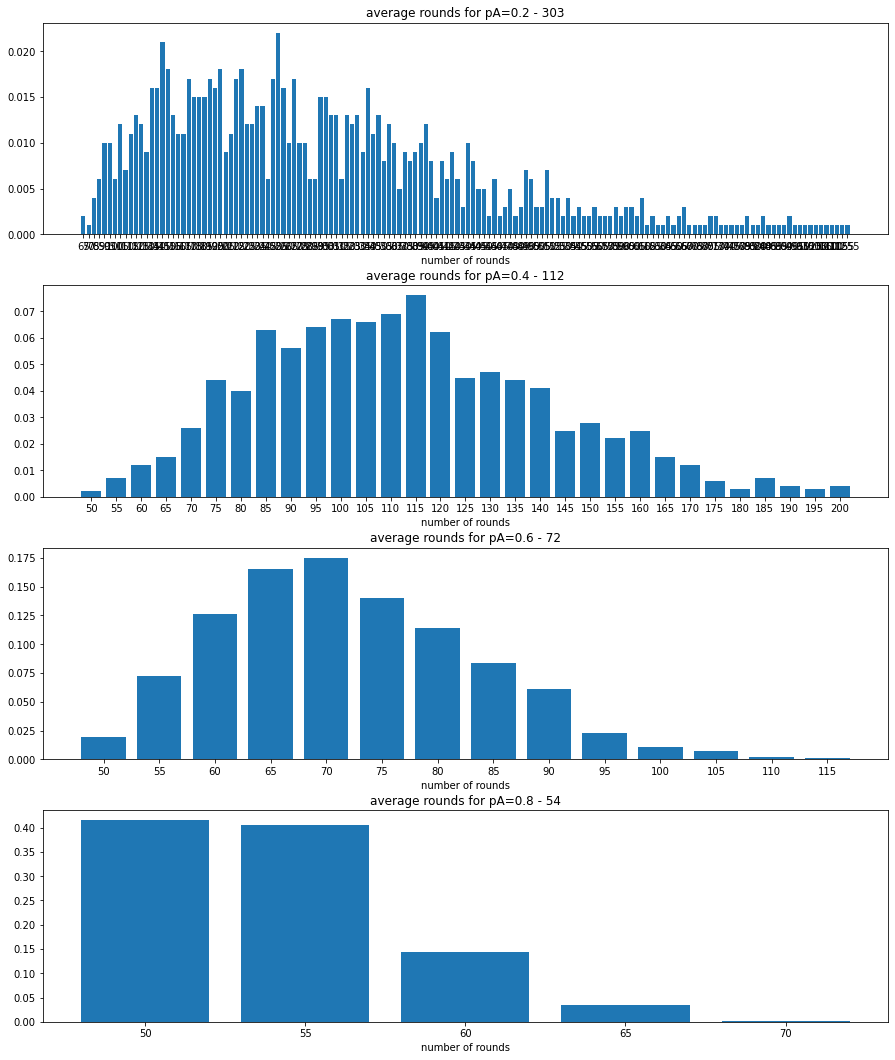

In [42]:
capital = 50
probs = [1/5,2/5,3/5,4/5]
plots=len(probs)
rounds=1000

fig,ax =  plt.subplots(plots,figsize=(13,15))
fig.tight_layout(pad=3.0)
for j in range(plots):
    p=probs[j]
    propabilities=[p]
    propabilities.extend([(1-p)/4]*4)
    sim_games = simulate_game(capital,propabilities,rounds)
    data={}
    for game in sorted(set(sim_games)):
        data[str(game)]=sim_games.count(game)/len(sim_games)
    average_rounds=int(sum(sim_games)/len(sim_games))
    ax[j].set_xlabel('number of rounds')
    ax[j].set_title('average rounds for pA={} - {}'.format(p,average_rounds))
    ax[j].bar(data.keys(),data.values())
plt.show()